In [1]:
import numpy as np
import matplotlib.pyplot as plt

 the NSTM is -0.8738573766073865 degrees Celsius


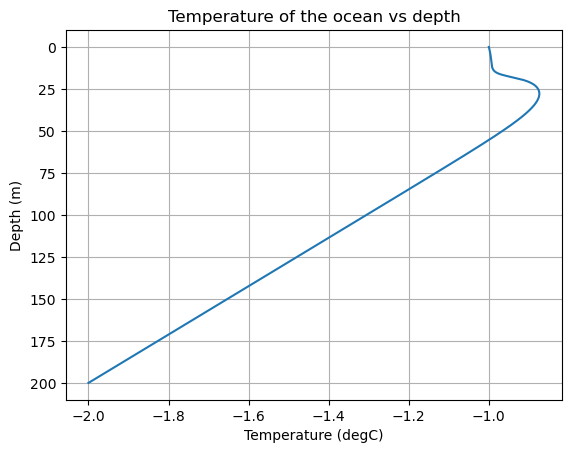

In [2]:
# Define our constants
cp = 4e6 # J/m^3/degC
h = 10 # m
alpha = 10 # m
Amax = 1e-2 # m^2/s
Adepth = 1e-4 # m^2/s
Adip = 1.5e-3 # m^2/s
delta_d = 0.1 # m
len = 200 # m
n = int(len/delta_d) +1 # size of matrix

# Define some needed functions
def find_light(d):
    """
    Input: depth (in m)
    Output: 45*alpha*delta_d/cp * exp(-d/alpha)

    This function essentially returns what we find in column b
    """
    return (-45*(delta_d**2)*np.exp(-d/alpha))/(cp*alpha)

def find_Ah(d):
    """
    Input: depth
    Output: Ah for both cases
    """
    if (d <= h):
        return Amax
    else:
        return Adepth + (Amax - Adepth - Adip*(d-h))*np.exp(-0.5*(d-h))


def find_Ah_prime(d):
    """
    Input: depth
    Output: returns the derivative of Ah for d>h
    """
    d_Ah = np.exp(-0.5*(d-h))*(-Adip - 0.5*(Amax-Adepth-Adip*(d-h)))
    return d_Ah


def create_arrays():
    """
    Creates our matrix and b vector to be solved
    """
    matrix = np.zeros((n,n))
    b = np.zeros(n)
    depth = delta_d
    b[0] = -1
    b[-1] = -2
    matrix[-1][-1]=1
    matrix[0][0]=1
    for i in range(n-2):
        if (depth <= h):
            matrix[i+1][i]=1
            matrix[i+1][i+1]=-2
            matrix[i+1][i+2]=1
            b[i+1] = find_light(depth)/Amax
        else:
            matrix[i+1][i]=find_Ah(depth)-find_Ah_prime(depth)*delta_d
            matrix[i+1][i+1]=find_Ah_prime(depth)*delta_d-2*find_Ah(depth)
            matrix[i+1][i+2]=find_Ah(depth)
            b[i+1] = find_light(depth)
        depth += delta_d
    return matrix, b


# Solve the matrix equation and plot the result against a depth array of the same size
mat,b = create_arrays()
t = np.linalg.solve(mat,b)
depth = np.arange(0,200 + delta_d,delta_d)
plt.plot(t,depth)
plt.title("Temperature of the ocean vs depth")
plt.xlabel("Temperature (degC)")
plt.ylabel("Depth (m)")
plt.gca().invert_yaxis()
plt.grid()
print(f' the NSTM is {t.max()} degrees Celsius')